In [1]:
from src.preprocessing import preprocess_data

In [2]:
x_train, x_test, y_train, y_test = preprocess_data(path='/home/twoics/py-proj/ecg-classification/plt', target_class='HYP')

Loading data


100%|██████████| 21799/21799 [01:10<00:00, 309.86it/s]


Dropping other
Filtering outliers


100%|██████████| 11718/11718 [00:04<00:00, 2454.41it/s]


Applying moving average


100%|██████████| 10916/10916 [00:23<00:00, 468.32it/s]


Balancing data
Train-test split


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from src.genetic.evolution import Evolution
evolution = Evolution(x_train, y_train, x_test, y_test)
evolution.fit(25)

WARNING
Epoch 0
		[7, 120, 4, 11, 48, 2, 9, 132, 2], Epoch: 2
		[15, 12, 3, 7, 24, 3, 17, 132, 4], Epoch: 2
		[11, 60, 1, 7, 60, 1, 7, 132, 1], Epoch: 2
		[17, 72, 1, 11, 144, 5, 19, 96, 3], Epoch: 22
		[13, 132, 4, 15, 12, 1, 5, 60, 3], Epoch: 2
	 Metrics [0.7882079131109387, 0.4918541505042669, 0.843289371605896, 0.9022498060512025, 0.7013188518231187]
	 Mean metric: 0.7453840186190845


Epoch 1
		[13, 132, 4, 15, 12, 1, 5, 60, 3], Epoch: 2
		[13, 132, 1, 7, 60, 1, 7, 132, 1], Epoch: 2
		[5, 120, 4, 11, 48, 2, 9, 132, 4], Epoch: 2
		[5, 120, 4, 11, 48, 2, 7, 132, 1], Epoch: 2
		[17, 120, 3, 7, 108, 2, 11, 72, 4], Epoch: 9
	 Metrics [0.6105508145849495, 0.8355314197051978, 0.5678820791311094, 0.799844840961986, 0.878200155159038]
	 Mean metric: 0.7384018619084561


Epoch 2
		[9, 132, 4, 15, 108, 2, 11, 72, 4], Epoch: 9
		[9, 132, 4, 15, 12, 1, 5, 60, 1], Epoch: 2
		[9, 132, 1, 7, 60, 1, 7, 132, 4], Epoch: 9
		[9, 132, 4, 11, 48, 2, 7, 132, 1], Epoch: 2
		[15, 72, 1, 17, 12, 3, 19, 144

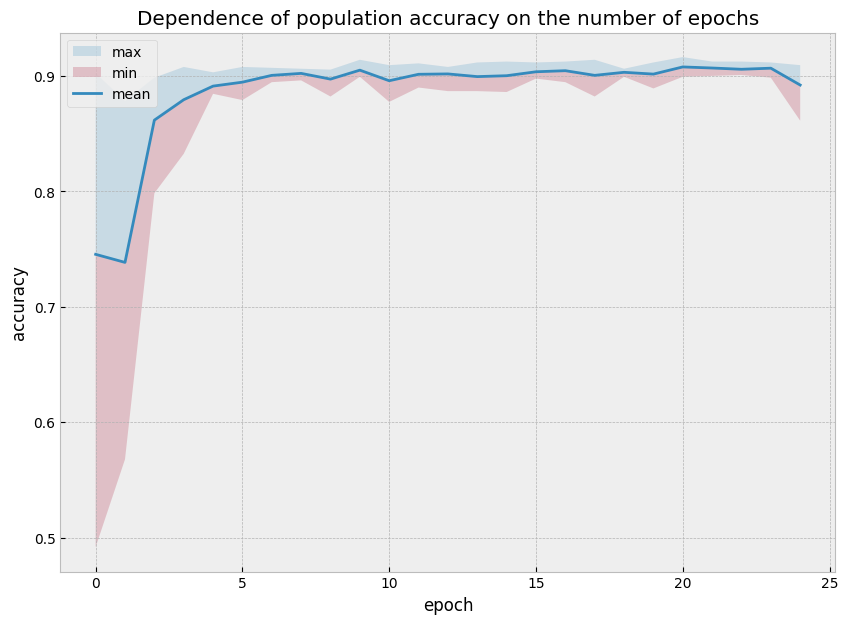

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

fig, ax  = plt.subplots(figsize=(10,7))
x, mean = [i for i in range(len(evolution.means))], np.array(evolution.means)

max_y = np.array(evolution.maxes)
min_y = np.array(evolution.mines)

ax.fill_between(x, mean, max_y, where=(max_y > mean), alpha=0.2, label='max')
ax.fill_between(x, mean, min_y, where=(min_y < mean), alpha=0.2, label='min')
plt.title('Dependence of population accuracy on the number of epochs')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.plot(x, mean, label='mean')
plt.legend()
plt.show()